# **Proceso de Selección de Características: Análisis de Componentes Principales (PCA)**


------------------------------------------------------------
 Nombre del archivo  : step02_PCA_sEMGnomMinMaxForSubjectFFCLE.ipynb

 Autor               :   Jonathan Eduardo Castilla Zamora

 Github              :   https://github.com/JonathanCastilla/sEMG-RealTime-PatternRecognition-for-GripperControl

 Institución         :   Instituto Politécnico Nacional (IPN)

 Fecha de creación   :   Febrero/2025

 Última modificación :   Junio/2025

 Versión             :   1.3.1

 Descripción         :   Como parte del ultimo procedimiento del proceso de seleccion de caracteristicas resuelta subsecuente la implementacion del algoritmo para el Analisis de Componentes Principales (PCA) del conjunto de los vectores de caracteristicas con menor grado de asociacion lineal entre ellas, cuales estas variables se asume que explican la variabilidad del conjunto de las muestras almacenadas y procesadas de los dos protocolos de adquisición M3sec y M5sec para todos los sujetos del conjunto de datos a traves de la metodología del recorrido de ventanas y porcentajes de solapamiento para la extracción de estas características (variables).

 Bajo esta vía de desarrollo, tras obtener los nombres (específicamente, los acrónimos) de las características a utilizar para el Análisis de Componentes Principales (PCA) se iteran nuevamente los algoritmos de integracion como exportación del conjunto de características a archivos CSV, generando nuevamente las matrices del conjunto de características en el dominio del tiempo de las señal sEMG postprocesada de interés (sEMG_FFC_LE_ESP32) pero solamente de aquellas resultantes del algoritmo de Matriz de Correlación.

 Esta segunda discriminación de características tiene como fin resumir este conjunto en un número menor de variables representativas que expliquen colectivamente la mayor parte la variabilidad del conjunto del que procede, es decir, aplicar una reducción a la dimensionalidad de los datos asumiendo que cada una de estas variables (características) describen cada una
 de las muestras para todos los sujetos. Este enfoque, como se comento antaño, funge como antecedente para el proceso de entrenamiento como inferencia del clasificador de Aprendizaje Automático de tipo supervisado
                        


------------------------------------------------------------


## Importación de bibliotecas

In [ ]:
import pandas as pd # Importa la biblioteca pandas, utilizada para la carga, manipulación y análisis de datos estructurados,
# especialmente en formato tabular mediante DataFrames.
import numpy as np # Importa numpy, una biblioteca fundamental para cálculos numéricos,
# especialmente útil para operar con arreglos y matrices, base para los cálculos de PCA.
import matplotlib.pyplot as plt # Importa matplotlib.pyplot, una herramienta de visualización en 2D.
# Se usa aquí para graficar resultados del PCA, como la varianza explicada o proyecciones en componentes principales.
from sklearn.decomposition import PCA # Importa PCA (Análisis de Componentes Principales) desde scikit-learn, una técnica estadística que permite
# reducir la dimensionalidad del conjunto de datos, manteniendo la mayor cantidad posible de varianza (información)
# al transformar las variables originales en un nuevo conjunto de variables ortogonales llamadas componentes principales.
from sklearn.preprocessing import MinMaxScaler # Importa MinMaxScaler desde sklearn, una técnica de normalización que reescala cada característica
# al rango [0, 1], lo cual es importante antes de aplicar PCA para evitar que características con distintas escalas dominen la descomposición.

## Definición de los archivos de datos correspondientes a cada gesto de muñeca para cada canal analógico:


* Extensor Común de los Dedos (EDC)

* Flexor Superficial de los Dedos (FDS)



### Características seleccionadas a partir de la matriz de Correlación

### Protocolo de adquisición: M5sec

In [ ]:
# Definición de los archivos de datos correspondientes a cada gesto para ambos músculos (EDC y FDS)
# Archivos de datos M5sec
archivoWF_EDC_M5 = '/content/datosSensor_MAD_EDC_WF_M5sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Wrist Flexion (WF) - Músculo EDC
archivoWF_FDS_M5 = '/content/datosSensor_MAD_FDS_WF_M5sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Wrist Flexion (WF) - Músculo FDS
archivoWE_EDC_M5 = '/content/datosSensor_MAD_EDC_WE_M5sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Wrist Extension (WE) - Músculo EDC
archivoWE_FDS_M5 = '/content/datosSensor_MAD_FDS_WE_M5sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Wrist Extension (WE) - Músculo FDS
archivoHC_EDC_M5 = '/content/datosSensor_MAD_EDC_HC_M5sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Hand Close (HC) - Músculo EDC
archivoHC_FDS_M5 = '/content/datosSensor_MAD_FDS_HC_M5sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Hand Close (HC) - Músculo FDS

### Protocolo de adquisición: M3sec

In [ ]:
# Archivos de datos M3sec
archivoWF_EDC_M3 = '/content/datosSensor_MAD_EDC_WF_M3sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Wrist Flexion (WF) - Músculo EDC
archivoWF_FDS_M3 = '/content/datosSensor_MAD_FDS_WF_M3sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Wrist Flexion (WF) - Músculo FDS
archivoWE_EDC_M3 = '/content/datosSensor_MAD_EDC_WE_M3sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Wrist Extension (WE) - Músculo EDC
archivoWE_FDS_M3 = '/content/datosSensor_MAD_FDS_WE_M3sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Wrist Extension (WE) - Músculo FDS
archivoHC_EDC_M3 = '/content/datosSensor_MAD_EDC_HC_M3sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Hand Close (HC) - Músculo EDC
archivoHC_FDS_M3 = '/content/datosSensor_MAD_FDS_HC_M3sec_sEMG_nomMinMaxForSubject_FFC_LE_ESP32_WL-MWL-IEMG-Variance-Skewness-Kurtosis-DASDV_gestos_dataSet.csv' # Movimiento Hand Close (HC) - Músculo FDS

### Archivos CSV unificados de características para ambos canales analógicos (EDC y FDS)

In [ ]:
# Archivos de reposo
archivoREP_EDC = '/content/reposo_EDC_unificado_dataSet.csv'
archivoREP_FDS = '/content/reposo_FDS_unificado_dataSet.csv'

## Normalización de vectores de características de las matrices resultantes del proceso de Extracción de Características mediante propuesta de recorridos de ventana y porcentajes de solapamiento

### Declaración de función para Normalización tipo MinMax

In [ ]:
# Función para normalizar cada columna de una matriz de manera independiente
def normalize_columns(matrix):
    # If the input is a DataFrame, convert it to a NumPy array
    if isinstance(matrix, pd.DataFrame):
        matrix = matrix.to_numpy()

    # Crear una copia de la matriz para no modificar la original
    normalized_matrix = np.zeros_like(matrix, dtype=float)

    # Recorrer cada columna y normalizarla
    for col in range(matrix.shape[1]):
        scaler = MinMaxScaler()
        normalized_matrix[:, col] = scaler.fit_transform(matrix[:, col].reshape(-1, 1)).flatten()

    return normalized_matrix

## Preparación de los archivos CSV obtenidos de la Matriz de Correlación..

1. Tras la carga de datos de las características con menor asociación lineal, se elimina la primera columna, que corresponde al índice o número de muestra (número de ventana de recorrido), esto se realiza dado que esta información no aporta ninguna métrica discriminatoria ni para el algoritmo de Matriz de Correlación, ni para el Análisis de Componentes Principales (PCA) De igual forma, el conjunto de datos se convierten en matrices NumPy para facilitar su manipulación posterior

2.  Seguidamente, se determina la mínima cantidad de muestras (valores de las ventanas de características extraídas) entre todos los gestos y músculos para asegurar que cada clase contenga el mismo número de ejemplos, evitando errores en el proceso de datos por desbalance de número de datos por lo que los conjuntos de características se recortan a dicho tamaño para, después, concatenarse verticalmente para formar dos matrices completas: una para el músculo Extensor Digitorum Communis (EDC) y otra para el músculo Flexor Digitorum Superficialis (FDS).

  * Estos se concatenan en una única matriz que representa todo el conjunto de
 características a analizar. El propósito de esta concatenación, como se mencionó anteriormente, es para analizar las correlaciones cruzadas entre características de diferentes músculos y no limitar los resultados del algoritmo a un músculo específico (canal analógico, en particular). Esta concatenación permite obtener las características relevantes que pueden explicar la variabilidad del conjunto de características independientemente del canal analógico del que provengan (FDS o EDC), por lo que este enfoque permite realizar un análisis generalizado de las características relevantes del conjunto de datos.


In [ ]:
# Cargar archivos en DataFrames
WF_EDC = pd.concat([
    pd.read_csv(archivoWF_EDC_M5),
    pd.read_csv(archivoWF_EDC_M3)
], ignore_index=True)

WF_FDS = pd.concat([
    pd.read_csv(archivoWF_FDS_M5),
    pd.read_csv(archivoWF_FDS_M3)
], ignore_index=True)

WE_EDC = pd.concat([
    pd.read_csv(archivoWE_EDC_M5),
    pd.read_csv(archivoWE_EDC_M3)
], ignore_index=True)

WE_FDS = pd.concat([
    pd.read_csv(archivoWE_FDS_M5),
    pd.read_csv(archivoWE_FDS_M3)
], ignore_index=True)

HC_EDC = pd.concat([
    pd.read_csv(archivoHC_EDC_M5),
    pd.read_csv(archivoHC_EDC_M3)
], ignore_index=True)

HC_FDS = pd.concat([
    pd.read_csv(archivoHC_FDS_M5),
    pd.read_csv(archivoHC_FDS_M3)
], ignore_index=True)

# Reposo se mantiene igual
REP_EDC = pd.read_csv(archivoREP_EDC)
REP_FDS = pd.read_csv(archivoREP_FDS)

# Extraer características
caracteristicas = WF_EDC.columns[1:].tolist()
print("Características:", caracteristicas)

# Eliminar primera columna (número de muestra)
WF_EDC = WF_EDC.iloc[:, 1:]
WF_FDS = WF_FDS.iloc[:, 1:]
WE_EDC = WE_EDC.iloc[:, 1:]
WE_FDS = WE_FDS.iloc[:, 1:]
HC_EDC = HC_EDC.iloc[:, 1:]
HC_FDS = HC_FDS.iloc[:, 1:]
REP_EDC = REP_EDC.iloc[:, 1:]
REP_FDS = REP_FDS.iloc[:, 1:]

# Convertir a matrices NumPy
matrices_EDC = [WF_EDC.to_numpy(), WE_EDC.to_numpy(), HC_EDC.to_numpy(), REP_EDC.to_numpy()]
matrices_FDS = [WF_FDS.to_numpy(), WE_FDS.to_numpy(), HC_FDS.to_numpy(), REP_FDS.to_numpy()]

# Determinar mínimo de filas
min_filas = min(mat.shape[0] for mat in matrices_EDC + matrices_FDS)

# Recortar todas al mínimo
matrices_EDC = [mat[:min_filas, :] for mat in matrices_EDC]
matrices_FDS = [mat[:min_filas, :] for mat in matrices_FDS]

# Concatenar verticalmente
P_EDC = np.vstack(matrices_EDC)
P_FDS = np.vstack(matrices_FDS)

print("Forma final P_EDC:", P_EDC.shape)
print("Forma final P_FDS:", P_FDS.shape)

Características: ['WL', 'MWL', 'IEMG', 'Variance', 'Skewness', 'Kurtosis', 'DASDV']
Forma final P_EDC: (26360, 7)
Forma final P_FDS: (26360, 7)


In [ ]:
def get_min_max(data):
    """
    Obtiene los valores mínimos y máximos de cada columna (característica) en el conjunto de datos.

    Parámetros:
        data (numpy.ndarray): Matriz de datos donde cada fila es un segmento y cada columna es una característica.

    Retorna:
        min_values (numpy.ndarray): Array con los valores mínimos de cada columna.
        max_values (numpy.ndarray): Array con los valores máximos de cada columna.
    """
    min_values = np.min(data, axis=0)  # Mínimo de cada columna
    max_values = np.max(data, axis=0)  # Máximo de cada columna
    return min_values, max_values

##  Unificación global y normalización de tipo MinMaxScaler por característica de las matrices de características para ambos canales analógicos: Extensor Digitorum Communis (EDC) y Flexor Digitorum Superficialis (FDS).

Las matrices de características asociadas a ambos canales analógicos (FDS y EDC) se concatenan en una sola matriz, este es la última unificación de los conjuntos de datos, representando la fusión de información de los valores de las ventanas de recorrido resultantes del proceso de extracción de características así como del primer proceso de discriminación de características debidamente ordenadas por característica de las señales sEMG multicanal

Estos se concatenan en una única matriz que representa todo el conjunto de características a analizar. El propósito de esta concatenación, como se mencionó anteriormente, es para analizar las correlaciones cruzadas entre características de diferentes músculos y no limitar los resultados del algoritmo a un músculo específico (canal analógico, en particular). Esta concatenación permite obtener las características relevantes que pueden explicar la variabilidad del conjunto de características independientemente del canal analógico del que provengan (FDS o EDC), por lo que este enfoque permite realizar un análisis generalizado de las características relevantes del conjunto de datos.

Para el desarrollo del algoritmo de Análisis de Componentes Principales se hereda el enfoque de aplicar una normalización de tipo MinMaxScaler a cada columna, es decir, a todo el vector de un tipo de característica, garantizando que los valores de cada columna se encuentren en un rango de R : [0,1]. Se enfatiza nuevamente este paso en particular en la medida de que, pese a que la extracción de características procede a muestras ya normalizadas de tipo MinMaxScaler por sujeto (específicamente, del tipo de postprocesamiento Feed Forward Comb (FFC) con Envolvente Lineal obtenido desde el microcontrolador ESP32), esto no garantiza dada la naturaleza de las diferentes características al calcularse que los valores de las ventanas de recorrido extraídas estén acotados en el rango R : [0,1]. Como se mencionó para el caso del algoritmo de Matriz de Correlación, al enlistarse las características a emplear se comprobó que para cada tipo de característica en particular, estas pueden superar el valor de la unidad o estar por debajo de la unidad en el valor máximo encontrado del todo conjunto de datos. Es por ello que, se realiza nuevamente la normalización de tipo MinMaxScaler de los valores de las ventanas de recorrido asociada a cada característica en particular, garantizando que las mismas condiciones que se utilizaron para la Matriz de Correlación se apliquen para el Análisis de Componentes Principales (PCA).

### Concatenación de características sin importar su canal analógico

In [ ]:
# Concatenación de características de ambos músculos en una sola matriz de datos
data = np.vstack((P_EDC, P_FDS))
# Aplicar normalización MinMaxScaler de los datos concatenados por característica
data = normalize_columns(data)
print(f"\nForma de los conjuntos de datos totales:")
print(f"P_EDC: {P_EDC.shape}")
print(f"P_FDS: {P_FDS.shape}")
print(f"data: {data.shape}")
# print(data)


Forma de los conjuntos de datos totales:
P_EDC: (26360, 7)
P_FDS: (26360, 7)
data: (52720, 7)


## Manejo de valores no definidos (NaN) obtenidos en el proceso de extracción de características y exportación en archivos CSV.

Al igual que el algoritmo abordado previamente, se realizó la verificación asociada a la imputación de datos no definidos (valores NaN), esto para corregir posibles errores en el cálculo de características de algoritmos previos en caso de presentarse. Este reemplazo de valores no definidos (NaN) se implementó, de igual forma, mediante propagación hacia adelante (forward fill) y propagación hacia atrás (backward fill) que permite sustituir estos valores no definidas para una ventana en particular con el valor de una ventana previa o posterior, como se abordó y se detalló para el caso de la Matriz de Correlación.

In [ ]:
def fill_nan_with_previous(data):
    """
    Reemplaza los valores NaN en cada columna por el valor anterior en esa misma columna.
    Si el primer valor es NaN, se utiliza el siguiente valor válido.

    Parámetros:
        data (numpy.ndarray): Matriz de datos con posibles NaN.

    Retorna:
        numpy.ndarray: Matriz con los NaN reemplazados.
    """
    df = pd.DataFrame(data)
    df_filled = df.fillna(method='ffill').fillna(method='bfill')
    return df_filled.to_numpy()

In [ ]:
data = fill_nan_with_previous(data)

<ipython-input-9-5d0a3097ae74>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df.fillna(method='ffill').fillna(method='bfill')


In [ ]:
min_values, max_values = get_min_max(data)

print("Valores mínimos de cada característica:", min_values)
print("Valores máximos de cada característica:", max_values)

Valores mínimos de cada característica: [0. 0. 0. 0. 0. 0. 0.]
Valores máximos de cada característica: [1. 1. 1. 1. 1. 1. 1.]


## Aplicación del algoritmo del Análisis de Componentes Principales (PCA) a través de la función PCA() de la biblioteca sklearn a la matriz unificada de ambos canales analógicos (EDC y FDS).

Tras aplicar la función del Análisis de Componentes Principales (PCA) se generan cada una de las componentes principales que resultan en las combinaciones lineales normalizada de cada una de las variables (características) obtenidas del conjunto resultante de la Matriz de Correlación como se describió en la Ec. (3.4.5). En este sentido, el algoritmo permite extraer la siguiente información:
  * La varianza explicada por cada componente principal.
  * Cargas o pesos (loadings) de cada una componentes principales sobre cada
 característica, dónde estas cargas indican la importancia que tiene cada variable en cada componente y, por tanto, ayudan a conocer el tipo de información recoge cada una de las componentes. De símil modo, se enfatiza el hecho de que el orden de importancia de las componentes viene dado por la magnitud del eigenvalor asociado a cada eigenvector.
  * Identificación de las características más relevantes en el primer componente
 principal.
  * Cálculo de la varianza total explicada por las características más significativas.
  * Mostrar las características más relevantes para cada componente principal.

In [ ]:
# Crear nombres de características para ambos músculos
caracteristicas = [f"{c}" for c in caracteristicas]
# Asignar nombres de columnas al DataFrame
df = pd.DataFrame(data, columns=caracteristicas)

# **Imputación de valores faltantes (NaN) con la media de la columna**
df = df.fillna(df.mean()) #**Rellenar los valores faltantes con la media**

# Normalización de los datos para PCA
#scaler = StandardScaler()
# df_escalada = scaler.fit_transform(df)

# Aplicación de PCA
pca = PCA()
pca.fit(df)

# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance_ratio)
print(f"Varianza explicada por cada componente: {explained_variance_ratio}")
print(f"Varianza total explicada: {total_explained_variance}")

# Cargas de los componentes principales sobre cada característica
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=caracteristicas)
# print("\nCargas de cada característica en los componentes principales:")
# print(loadings_df.head())


# Identificación de las características más relevantes en el primer componente
top_features_component_1 = loadings_df.iloc[0].abs().sort_values(ascending=False)
top_features_names = top_features_component_1.head().index.tolist()
print("\nCaracterísticas más significativas en el primer componente principal:")
print(top_features_names)
print(top_features_component_1.head())


# Cálculo de la varianza total explicada por las características más significativas
top_features_variance = top_features_component_1.head().sum()
print(f"Varianza explicada por las características más significativas: {top_features_variance}")


Varianza explicada por cada componente: [0.80563039 0.08363329 0.06275686 0.01752886 0.01457406 0.01147468
 0.00440186]
Varianza total explicada: 1.0

Características más significativas en el primer componente principal:
['IEMG', 'WL', 'MWL', 'Variance', 'DASDV']
IEMG        0.835220
WL          0.391964
MWL         0.357811
Variance    0.106074
DASDV       0.097383
Name: 0, dtype: float64
Varianza explicada por las características más significativas: 1.7884526719150753


In [ ]:
# Identificación de las características más relevantes en el primer componente
top_features_component_1 = loadings_df.iloc[0].abs().sort_values(ascending=False)
top_features_names = top_features_component_1.head().index.tolist()
print("\nCaracterísticas más significativas en el primer componente principal:")
print(top_features_component_1.head(20))


Características más significativas en el primer componente principal:
IEMG        0.835220
WL          0.391964
MWL         0.357811
Variance    0.106074
DASDV       0.097383
Kurtosis    0.002729
Skewness    0.000127
Name: 0, dtype: float64


## Selección de características relevantes a emplear para el clasificador de Apren dizaje Automático (Machine Learning) de tipo supervisado través de la consideración de las cargas (pesos) de las componentes principales (combinaciones lineales de las características con menor asociación lineal) como de los eigenvalores asociados a cada unas de las componentes principales.

 1. Se seleccionan las características más relevantes evaluando los valores absolutos de las cargas o pesos (loadings) de cada componente:
 * Para la primera componente principal, se ordenan las características por su
 contribución absoluta y se seleccionan las 5 más importantes.
    * Este procedimiento se repite para cada componente principal.

In [ ]:
# Mostrar las características más relevantes para cada componente principal
for component in range(loadings_df.shape[0]):  # Itera a través de cada componente principal
    top_features_component = loadings_df.iloc[component].abs().sort_values(ascending=False)
    top_features_names = top_features_component.head().index.tolist()
    print(f"\nCaracterísticas más significativas en el componente principal {component + 1}:")
    print(top_features_names)
    print(top_features_component.head())



Características más significativas en el componente principal 1:
['IEMG', 'WL', 'MWL', 'Variance', 'DASDV']
IEMG        0.835220
WL          0.391964
MWL         0.357811
Variance    0.106074
DASDV       0.097383
Name: 0, dtype: float64

Características más significativas en el componente principal 2:
['IEMG', 'MWL', 'WL', 'Variance', 'DASDV']
IEMG        0.532820
MWL         0.527114
WL          0.495313
Variance    0.311279
DASDV       0.300494
Name: 1, dtype: float64

Características más significativas en el componente principal 3:
['MWL', 'Variance', 'WL', 'IEMG', 'Skewness']
MWL         0.694977
Variance    0.589115
WL          0.410032
IEMG        0.032310
Skewness    0.022906
Name: 2, dtype: float64

Características más significativas en el componente principal 4:
['Skewness', 'Variance', 'WL', 'MWL', 'Kurtosis']
Skewness    0.842629
Variance    0.413403
WL          0.295212
MWL         0.147861
Kurtosis    0.088735
Name: 3, dtype: float64

Características más significativas en

In [ ]:
# Cálculo de la varianza explicada por la primera componente principal
varianza_pc1 = explained_variance_ratio[0]
print(f"Varianza explicada por la primera componente principal: {varianza_pc1}")

Varianza explicada por la primera componente principal: 0.8056303932200013


## Visualización con gráfico de codo Finalmente, el algoritmo de Análisis de Componentes Principales (PCA) concluye en la generación de un gráfico de codo o gráfico de hombro con el fin de visualizar el número de componentes principales a utilizar a través de la ilustración de la siguiente información:

 * Visualización de la varianza explicada individualmente por cada componente (barras rojas).
 * Visualización de la varianza acumulada (línea punteada azul).

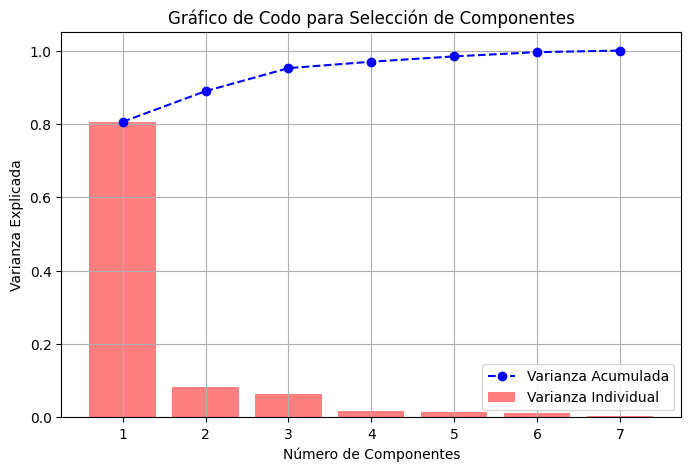

In [ ]:
# Gráfico de codo con varianza acumulada y varianza individual
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--', color='b', label='Varianza Acumulada')
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, color='r', label='Varianza Individual')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.title('Gráfico de Codo para Selección de Componentes')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Determinación del número óptimo de componentes usando el 95% de varianza explicada
explained_variance_percentage = 0.90
num_componentes_optimos = np.argmax(np.cumsum(explained_variance_ratio) >= explained_variance_percentage) + 1
print(f"Número óptimo de componentes para retener el {explained_variance_percentage * 100} % de la varianza: {num_componentes_optimos}")

Número óptimo de componentes para retener el 90.0 % de la varianza: 3


In [ ]:
# Obtener las características más significativas del primer componente principal
top_features_PC1 = loadings_df.iloc[0].abs().sort_values(ascending=False)
top_features_PC1_names = top_features_PC1.head().index.tolist()

# Imprimir las características más relevantes del primer componente principal
print("\nCaracterísticas más significativas del primer componente principal (PC1):")
print(top_features_PC1_names)
print(top_features_PC1.head())

# Diccionarios para contar la frecuencia de aparición de características
feature_counts_all = {}  # Contará frecuencia en todos los componentes hasta el óptimo
feature_counts_excluding_PC1 = {}  # Contará frecuencia excluyendo PCA1

# Iterar sobre los componentes principales hasta el número óptimo determinado
for component in range(num_componentes_optimos):
    # Obtener las características más significativas de cada componente
    top_features_component = loadings_df.iloc[component].abs().sort_values(ascending=False)
    top_features_names = top_features_component.head().index.tolist()

    # Contabilizar la aparición en el conteo total
    for feature in top_features_names:
        feature_counts_all[feature] = feature_counts_all.get(feature, 0) + 1

    # Contabilizar en el conteo sin PCA1 (si el componente no es el primero)
    if component > 0:
        for feature in top_features_names:
            feature_counts_excluding_PC1[feature] = feature_counts_excluding_PC1.get(feature, 0) + 1

# Convertir los diccionarios en DataFrames para mejor visualización
feature_counts_all_df = pd.DataFrame.from_dict(feature_counts_all, orient='index', columns=['Frecuencia'])
feature_counts_all_df = feature_counts_all_df.sort_values(by='Frecuencia', ascending=False)

feature_counts_excluding_PC1_df = pd.DataFrame.from_dict(feature_counts_excluding_PC1, orient='index', columns=['Frecuencia'])
feature_counts_excluding_PC1_df = feature_counts_excluding_PC1_df.sort_values(by='Frecuencia', ascending=False)

# Mostrar la frecuencia de aparición de características en los primeros componentes seleccionados
print("\nFrecuencia de aparición de características en los primeros", num_componentes_optimos - 1, "componentes principales (excluyendo PC1):")
print(feature_counts_excluding_PC1_df)


print("\nFrecuencia de aparición de características en los primeros", num_componentes_optimos, "componentes principales (incluyendo PC1):")
print(feature_counts_all_df)



Características más significativas del primer componente principal (PC1):
['IEMG', 'WL', 'MWL', 'Variance', 'DASDV']
IEMG        0.835220
WL          0.391964
MWL         0.357811
Variance    0.106074
DASDV       0.097383
Name: 0, dtype: float64

Frecuencia de aparición de características en los primeros 2 componentes principales (excluyendo PC1):
          Frecuencia
IEMG               2
MWL                2
WL                 2
Variance           2
DASDV              1
Skewness           1

Frecuencia de aparición de características en los primeros 3 componentes principales (incluyendo PC1):
          Frecuencia
IEMG               3
WL                 3
MWL                3
Variance           3
DASDV              2
Skewness           1
